In [7]:
from bin_packing_solver import simulated_annealing
from genetic_algorithm_bin_packing import genetic_algorithm_bin_packing
from plots import plot_convergence_curve
from bin_packing_methods import generate_random_solution
from objective_evaluate import evaluate_solution
import time
import numpy as np
import matplotlib.pyplot as plt

item_list = [5, 7, 2, 9, 4, 3, 6, 8, 1, 10]
bin_capacity = 15


In [8]:
start_time = time.time()
gao_best, gao_score, gao_history = genetic_algorithm_bin_packing(
    item_list=item_list,
    bin_capacity=bin_capacity,
    population_size=20,
    max_generations=100,
    mutation_rate=0.3,
    patience=10,
    crossover_method='one_point'
)
gao_time = time.time() - start_time


In [9]:
start_time = time.time()
gau_best, gau_score, gau_history = genetic_algorithm_bin_packing(
    item_list=item_list,
    bin_capacity=bin_capacity,
    population_size=20,
    max_generations=100,
    mutation_rate=0.3,
    patience=10,
    crossover_method='uniform'
)
gau_time = time.time() - start_time


In [10]:
from bin_packing_solver import default_temperature

start_time = time.time()
sa_best, sa_history = simulated_annealing(
    item_list=item_list,
    bin_capacity=bin_capacity,
    max_iter=100,
    T_func=default_temperature
)
sa_score = evaluate_solution(sa_best)
sa_time = time.time() - start_time


In [11]:
print("Symulowane wyżarzanie score:", sa_score, "czas:", sa_time)
print("Algorytm genetyczny (one point) score:", gao_score, "czas:", gao_time)
print("Algorytm genetyczny (uniform) score:", gau_score, "czas:", gau_time)

Symulowane wyżarzanie score: 4.5 czas: 0.09660029411315918
Algorytm genetyczny (one point) score: 4.5 czas: 0.0010085105895996094
Algorytm genetyczny (uniform) score: 4.1 czas: 0.0013659000396728516


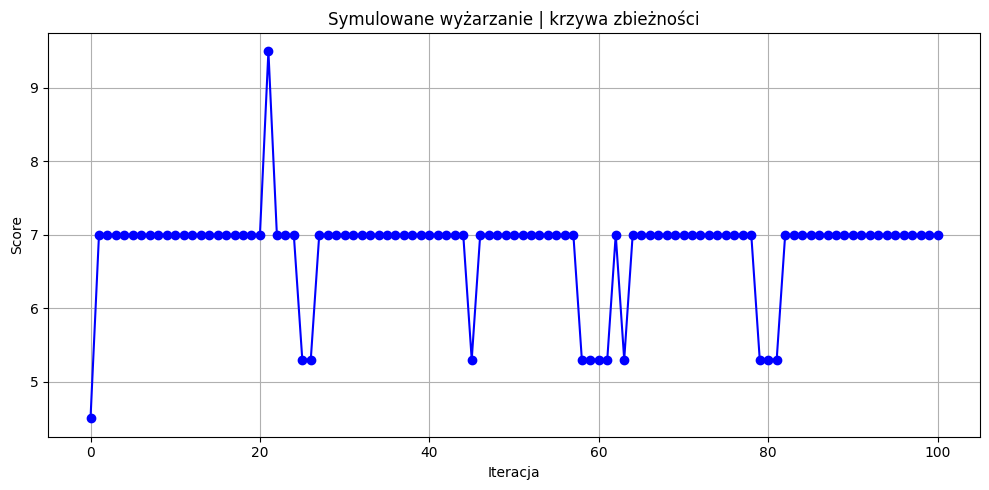

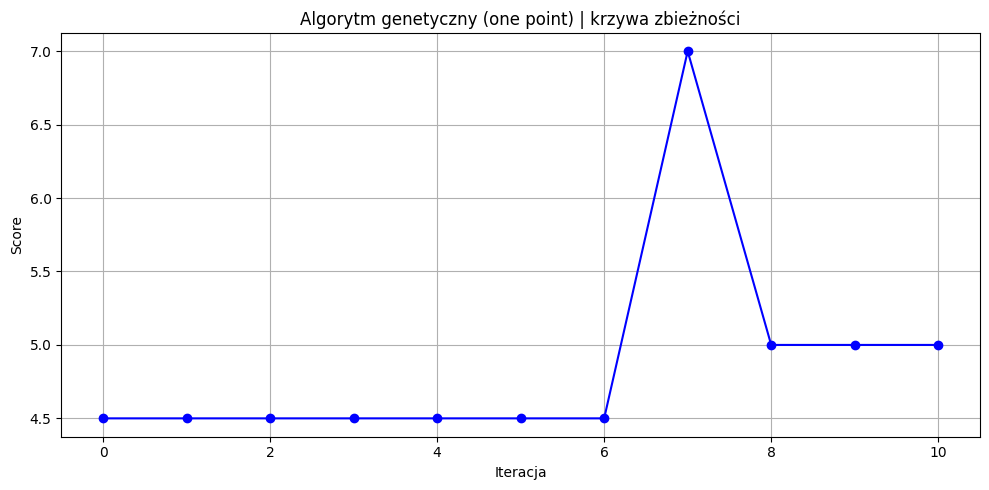

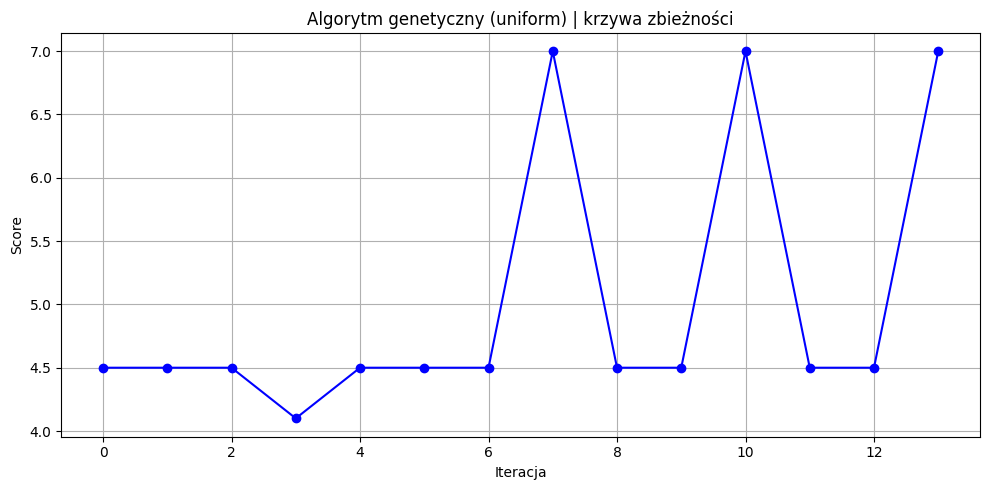

In [12]:
plot_convergence_curve(sa_history, title="Symulowane wyżarzanie | krzywa zbieżności")
plot_convergence_curve(gao_history, title="Algorytm genetyczny (one point) | krzywa zbieżności")
plot_convergence_curve(gau_history, title="Algorytm genetyczny (uniform) | krzywa zbieżności")


#### Eksperyment porównujący metody

- Symulowane wyżarzanie (SA):
max_iter = 100, T_func = default_temperature
→ score: 4.5, czas: ~0.097 s

- Algorytm genetyczny (one point crossover):
population_size = 10, mutation_rate = 0.3, patience = 10
→ score: 4.5, czas: ~0.0010 s

- Algorytm genetyczny (uniform crossover):
Te same parametry
→ score: 4.1, czas: ~0.0014 s

--- 

- GA z uniform crossoverem osiąga najlepszy wynik jakościowy (score 4.1).

- GA z one point crossoverem jest najbardziej wydajny przy tym samym score co SA.

- SA działa poprawnie, ale jest wyraźnie wolniejszy - ponieważ nie ma zaimplementowanego mechanizmu patience.